In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [2]:
data_dir = r'C:\Users\Priya Bhaskar\PycharmProjects\Deep learning practice\Cats and Dogs image classification\data'

In [3]:
data_dir

'C:\\Users\\Priya Bhaskar\\PycharmProjects\\Deep learning practice\\Cats and Dogs image classification\\data'

In [4]:
training_data = data_dir + '\\training_set\\'

In [5]:
training_data

'C:\\Users\\Priya Bhaskar\\PycharmProjects\\Deep learning practice\\Cats and Dogs image classification\\data\\training_set\\'

In [6]:
os.listdir(training_data)

['cats', 'dogs']

In [7]:
test_data = data_dir + '\\test_set'

In [8]:
os.listdir(test_data)

['cats', 'dogs']

In [9]:
training_data + 'cats'

'C:\\Users\\Priya Bhaskar\\PycharmProjects\\Deep learning practice\\Cats and Dogs image classification\\data\\training_set\\cats'

In [10]:
os.listdir(training_data + 'cats')[0]

'cat.1.jpg'

In [11]:
cat_img = training_data + '\\cats\\' + 'cat.1.jpg'

In [12]:
imread(cat_img)

array([[[ 39,  44,  40],
        [ 39,  44,  40],
        [ 40,  44,  43],
        ...,
        [207, 204, 173],
        [202, 199, 166],
        [201, 198, 163]],

       [[ 40,  45,  41],
        [ 40,  45,  41],
        [ 40,  44,  43],
        ...,
        [203, 200, 169],
        [199, 196, 163],
        [197, 194, 159]],

       [[ 40,  45,  41],
        [ 40,  45,  41],
        [ 40,  44,  43],
        ...,
        [199, 195, 166],
        [199, 194, 164],
        [199, 194, 162]],

       ...,

       [[ 32,  30,  31],
        [ 30,  28,  29],
        [ 26,  24,  25],
        ...,
        [ 36,  23,  17],
        [ 41,  30,  24],
        [ 57,  46,  40]],

       [[ 32,  30,  31],
        [ 30,  28,  29],
        [ 26,  24,  25],
        ...,
        [ 42,  29,  21],
        [ 44,  34,  25],
        [ 55,  45,  36]],

       [[ 32,  30,  31],
        [ 29,  27,  28],
        [ 25,  23,  24],
        ...,
        [ 51,  38,  30],
        [ 42,  32,  23],
        [ 40,  30,  21]]

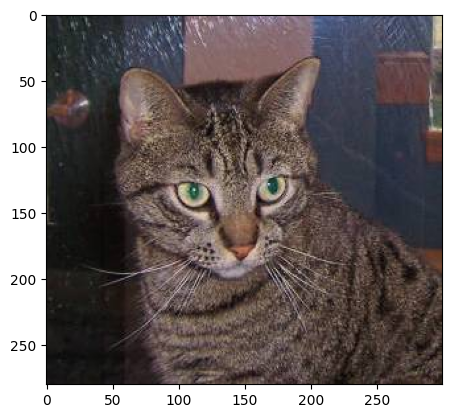

In [13]:
plt.imshow(imread(cat_img))

In [14]:
os.listdir(training_data + '\\dogs\\')[0]

'dog.1.jpg'

In [15]:
dog_img = training_data + '\\dogs\\' + 'dog.1.jpg'

In [16]:
imread(dog_img)

array([[[238, 224, 211],
        [169, 153, 137],
        [139, 116,  98],
        ...,
        [133, 102,  82],
        [128,  97,  77],
        [127,  96,  76]],

       [[250, 234, 219],
        [173, 154, 137],
        [133, 108,  86],
        ...,
        [115,  84,  64],
        [111,  80,  59],
        [110,  79,  59]],

       [[248, 230, 210],
        [170, 148, 127],
        [129, 101,  77],
        ...,
        [ 85,  54,  33],
        [ 83,  53,  29],
        [ 84,  53,  32]],

       ...,

       [[255, 255, 244],
        [254, 255, 241],
        [252, 250, 237],
        ...,
        [239, 240, 224],
        [238, 239, 223],
        [238, 239, 223]],

       [[255, 255, 244],
        [255, 255, 242],
        [252, 253, 239],
        ...,
        [245, 246, 232],
        [244, 245, 231],
        [244, 245, 231]],

       [[255, 255, 244],
        [255, 255, 243],
        [254, 255, 241],
        ...,
        [250, 251, 237],
        [248, 249, 235],
        [249, 250, 236]]

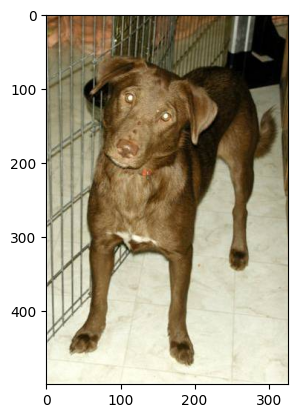

In [17]:
plt.imshow(imread(dog_img))

In [18]:
imread(cat_img).shape

(280, 300, 3)

In [19]:
imread(dog_img).shape

(499, 327, 3)

In [20]:
# check the dimenssions of the each image in the training data set

dim1 = []
dim2 = []

for img_name in os.listdir(training_data + '\\cats'):
    img = imread(training_data +'\\cats\\'+img_name)
    d1, d2, colors = img.shape
    dim1.append(d1)
    dim2.append(d2)
    

                


In [21]:
#dim1

In [22]:
#dim2

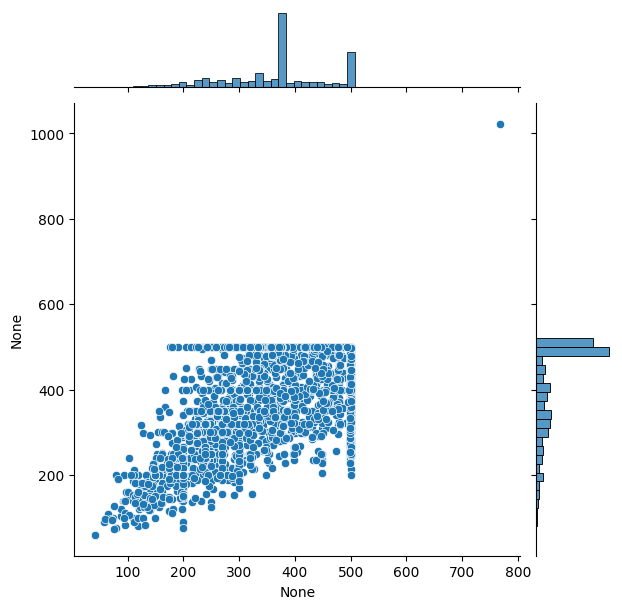

In [23]:
sns.jointplot(x=dim1, y=dim2,)
plt.show()

In [24]:
np.mean(dim1)

356.09925

In [25]:
np.mean(dim2)

409.61975

In [26]:
imread(dog_img).min()

0

In [27]:
imread(cat_img).min()

0

In [28]:
image_shape = (100, 100, 3)

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [30]:
img_gen = ImageDataGenerator(rescale=1/255,
                             shear_range=0.1,
                             horizontal_flip=True,
                             fill_mode='nearest')

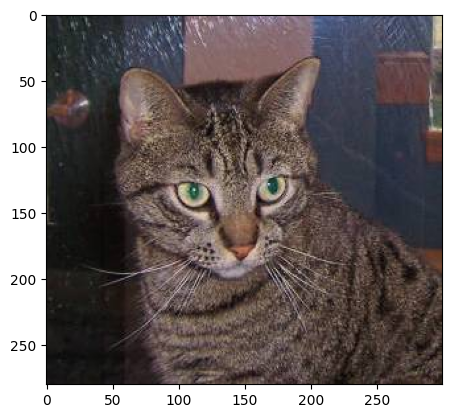

In [31]:
plt.imshow(imread(cat_img))

In [32]:
cat_pic = imread(cat_img)

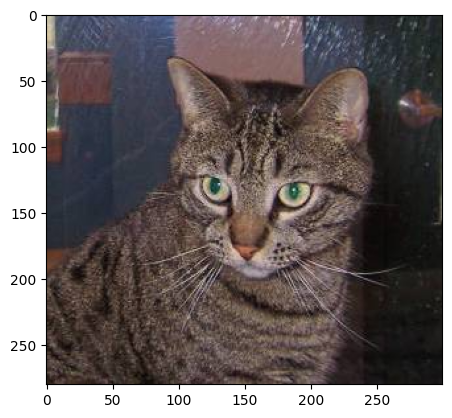

In [33]:
plt.imshow(img_gen.random_transform(cat_pic))

In [34]:
img_gen.flow_from_directory(training_data)

Found 8005 images belonging to 2 classes.


In [35]:
img_gen.flow_from_directory(test_data)

Found 2023 images belonging to 2 classes.


In [36]:
from tensorflow.keras import Sequential

In [37]:
from tensorflow.keras.layers import Conv2D, Dense, Dropout, MaxPool2D, Flatten

In [38]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 10, 32)        0

In [40]:
batch_size = 16

In [41]:
train_img_gen = img_gen.flow_from_directory(training_data,
                                           target_size=(100, 100),
                                           color_mode='rgb',
                                           batch_size=batch_size,
                                           class_mode='binary')

Found 8005 images belonging to 2 classes.


In [42]:
test_img_gen = img_gen.flow_from_directory(test_data,
                                          target_size=(100, 100),
                                          color_mode='rgb',
                                          batch_size=batch_size,
                                          class_mode='binary',
                                          shuffle=False)

Found 2023 images belonging to 2 classes.


In [43]:
train_img_gen.class_indices

{'cats': 0, 'dogs': 1}

In [44]:
test_img_gen.class_indices

{'cats': 0, 'dogs': 1}

In [45]:
model.fit_generator(generator=train_img_gen, epochs=5)

Epoch 1/5


C:\Users\Priya Bhaskar\AppData\Local\Temp\ipykernel_25044\3540932683.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator=train_img_gen, epochs=5)


501/501 [==============================] - 57s 112ms/step - loss: 0.6915 - accuracy: 0.5283
Epoch 2/5
501/501 [==============================] - 60s 120ms/step - loss: 0.6501 - accuracy: 0.6087
Epoch 3/5
501/501 [==============================] - 62s 123ms/step - loss: 0.5710 - accuracy: 0.7068
Epoch 4/5
501/501 [==============================] - 63s 126ms/step - loss: 0.5152 - accuracy: 0.7422
Epoch 5/5
501/501 [==============================] - 65s 131ms/step - loss: 0.4751 - accuracy: 0.7736


In [46]:
model.metrics_names

['loss', 'accuracy']

In [47]:
pred = model.predict_generator(test_img_gen)

C:\Users\Priya Bhaskar\AppData\Local\Temp\ipykernel_25044\2006573136.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred = model.predict_generator(test_img_gen)


In [48]:
pred

array([[0.4903539 ],
       [0.727844  ],
       [0.12543134],
       ...,
       [0.14094752],
       [0.82037187],
       [0.9034941 ]], dtype=float32)

In [49]:
predictions = pred > 0.6

In [50]:
predictions

array([[False],
       [ True],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [51]:
from sklearn.metrics import confusion_matrix, classification_report

In [52]:
confusion_matrix(test_img_gen.classes, predictions)

array([[918,  93],
       [394, 618]], dtype=int64)

In [53]:
print(classification_report(test_img_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.70      0.91      0.79      1011
           1       0.87      0.61      0.72      1012

    accuracy                           0.76      2023
   macro avg       0.78      0.76      0.75      2023
weighted avg       0.78      0.76      0.75      2023



In [54]:
from tensorflow.keras.preprocessing import image

In [61]:
my_test_img = image.load_img(cat_img, target_size=image_shape)

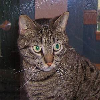

In [62]:
my_test_img

In [63]:
my_test_img_arr = image.img_to_array(my_test_img)

In [64]:
my_test_img_arr = np.expand_dims(my_test_img_arr, axis=0)

In [65]:
my_test_img_arr.shape

(1, 100, 100, 3)

In [66]:
model.predict(my_test_img_arr)

1/1 [==============================] - 0s 33ms/step


array([[0.]], dtype=float32)

In [67]:
model.save('cats_dogs_image_classification_model.h5')

C:\Users\Priya Bhaskar\PycharmProjects\Deep learning practice\Cats and Dogs image classification\cnn-env\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [68]:
test_dog_img = image.load_img(dog_img, target_size=image_shape)

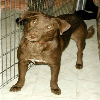

In [69]:
test_dog_img

In [70]:
test_dog_img_arr = image.img_to_array(test_dog_img)

In [72]:
test_dog_img_arr = np.expand_dims(test_dog_img_arr, axis=0)

In [75]:
r = model.predict(test_dog_img_arr)

1/1 [==============================] - 0s 30ms/step


In [78]:
r[0][0]

1.0

In [80]:
if r[0][0] == 1.0:
    print('Its a Dog')
else:
    print('Its a Cat')

Its a Dog


In [81]:
from tensorflow.keras.models import load_model

In [83]:
my_model = load_model('cats_dogs_image_classification_model.h5')

In [84]:
my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 10, 32)        0

In [87]:
def find_dog_or_cat(test_img):

    r = my_model.predict(test_img)
    if r[0][0] == 1.0:
        return 'Dog'
    else:
        return 'Cat'



    

In [88]:
find_dog_or_cat(test_img=my_test_img_arr)

1/1 [==============================] - 0s 33ms/step


'Cat'

In [89]:
find_dog_or_cat(test_img=test_dog_img_arr)

1/1 [==============================] - 0s 31ms/step


'Dog'